In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from skimage import io
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('movies.csv')
df.head(5)

id                              title  \
0  615656                  Meg 2: The Trench   
1  758323                The Pope's Exorcist   
2  667538   Transformers: Rise of the Beasts   
3  640146  Ant-Man and the Wasp: Quantumania   
4  677179                          Creed III   

                             genres original_language  \
0     Action-Science Fiction-Horror                en   
1           Horror-Mystery-Thriller                en   
2  Action-Adventure-Science Fiction                en   
3  Action-Adventure-Science Fiction                en   
4                      Drama-Action                en   

                                            overview  popularity  \
0  An exploratory dive into the deepest depths of...    8763.998   
1  Father Gabriele Amorth Chief Exorcist of the V...    5953.227   
2  When a new threat capable of destroying the en...    5409.104   
3  Super-Hero partners Scott Lang and Hope van Dy...    4425.387   
4  After dominating the boxing world Adonis Creed...    3994.342   

                                production_companies release_date  \
0  Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   
1  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   2023-04-05   
2  Skydance-Paramount-di Bonaventura Pictures-Bay...   2023-06-06   
3             Marvel Studios-Kevin Feige Productions   2023-02-15   
4  Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...   2023-03-01   

        budget      revenue  runtime    status  \
0  129000000.0  352056482.0    116.0  Released   
1   18000000.0   65675816.0    103.0  Released   
2  200000000.0  407045464.0    127.0  Released   
3  200000000.0  475766228.0    125.0  Released   
4   75000000.0  269000000.0    116.0  Released   

                                             tagline  vote_average  \
0                                  Back for seconds.         7.079   
1  Inspired by the actual files of Father Gabriel...         7.433   
2                                     Unite or fall.         7.340   
3            Witness the beginning of a new dynasty.         6.507   
4                      You can't run from your past.         7.262   

   vote_count                                            credits  \
0      1365.0  Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...   
1       545.0  Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...   
2      1007.0  Anthony Ramos-Dominique Fishback-Luna Lauren V...   
3      2811.0  Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...   
4      1129.0  Michael B. Jordan-Tessa Thompson-Jonathan Majo...   

                                            keywords  \
0                based on novel or book-sequel-kaiju   
1  spain-rome italy-vatican-pope-pig-possession-c...   
2  peru-alien-end of the world-based on cartoon-b...   
3  hero-ant-sequel-superhero-based on comic-famil...   
4  philadelphia pennsylvania-husband wife relatio...   

                        poster_path                     backdrop_path  \
0  /4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg  /qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg   
1  /9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg  /hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg   
2  /gPbM0MK8CP8A174rmUwGsADNYKD.jpg  /woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg   
3  /qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg  /m8JTwHFwX7I7JY5fPe4SjqejWag.jpg   
4  /cvsXj3I9Q2iyyIo95AecSd1tad7.jpg  /5i6SjyDbDWqyun8klUuCxrlFbyw.jpg   

                                     recommendations  
0  1006462-298618-569094-1061181-346698-1076487-6...  
1  713704-296271-502356-1076605-1084225-1008005-9...  
2  496450-569094-298618-385687-877100-598331-4628...  
3  823999-676841-868759-734048-267805-965839-1033...  
4  965839-267805-943822-842942-1035806-823999-107...

In [3]:
df.shape

(722480, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722480 entries, 0 to 722479
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722480 non-null  int64  
 1   title                 722474 non-null  object 
 2   genres                511978 non-null  object 
 3   original_language     722480 non-null  object 
 4   overview              604118 non-null  object 
 5   popularity            722480 non-null  float64
 6   production_companies  337256 non-null  object 
 7   release_date          670592 non-null  object 
 8   budget                722480 non-null  float64
 9   revenue               722480 non-null  float64
 10  runtime               688110 non-null  float64
 11  status                722480 non-null  object 
 12  tagline               108317 non-null  object 
 13  vote_average          722480 non-null  float64
 14  vote_count            722480 non-null  float64
 15  

In [5]:
df.isnull().sum()

id                           0
title                        6
genres                  210502
original_language            0
overview                118362
popularity                   0
production_companies    385224
release_date             51888
budget                       0
revenue                      0
runtime                  34370
status                       0
tagline                 614163
vote_average                 0
vote_count                   0
credits                 224876
keywords                512029
poster_path             184768
backdrop_path           499590
recommendations         687585
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df['title'].duplicated().sum()

147140

In [9]:
df[['title','release_date']].duplicated().sum()

62349

In [10]:
df.drop_duplicates(subset = ['title','release_date'],inplace = True)

In [11]:
df.shape

(660130, 20)

In [12]:
df1 = df[df.vote_count >= 20].reset_index()

In [13]:
df1.isnull().sum()

index                       0
id                          0
title                       0
genres                    166
original_language           0
overview                  442
popularity                  0
production_companies     3547
release_date                1
budget                      0
revenue                     0
runtime                     8
status                      0
tagline                 20960
vote_average                0
vote_count                  0
credits                   668
keywords                 9848
poster_path               118
backdrop_path            2138
recommendations         18731
dtype: int64

In [14]:
df1.fillna('',inplace=True)

In [15]:
index = df1[(df1['genres']=='') & (df1['overview']=='')].index

In [16]:
df1.drop(index, inplace = True)

In [17]:
df1['genres'] = df1['genres'].apply(lambda x: ' '.join(x.split('-')))
df1['keywords'] = df1['keywords'].apply(lambda x: ' '.join(x.split('-')))
df1['credits'] = df1['credits'].apply(lambda x: ' '.join(x.split('-')))

In [18]:
df1['tags'] = df1['overview'] + ' '+ df1['genres'] + ' ' + df1['keywords']+' '+df1['credits']+' '+df1['original_language']

In [19]:
df1.tags[0]

'An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operation threatens their mission and forces them into a high-stakes battle for survival. Action Science Fiction Horror based on novel or book sequel kaiju Jason Statham Wu Jing Shuya Sophia Cai Sergio Peris Mencheta Skyler Samuels Cliff Curtis Page Kennedy Sienna Guillory Melissanthi Mahut Kiran Sonia Sawar Felix Mayr Whoopie van Raam Guo Tao Robin Hill Dai Lele Sui Fong Ivy Tsui Stewart Alexander Li Xin Billy Clements Ron Smoorenburg Rui Shang Sara Dee Jonny James Bai Narisu Kenneth Won Able Wanamakok en'

In [20]:
stemmer = SnowballStemmer("english")
def stem(text):
    y = []
    
    for i in text.split():
        y.append(stemmer.stem(i))
        
    return ' '.join(y)
df1['tags'] = df1['tags'].apply(stem)

In [21]:
df1['tags']= df1['tags'].str.replace('[^\w\s]','')

In [22]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [23]:
tfidf_matrix = tfidf.fit_transform(df1['tags'])

In [24]:
df1.tags[0]

'an exploratori dive into the deepest depth of the ocean of a dare research team spiral into chao when a malevol mine oper threaten their mission and forc them into a high-stak battl for survival. action scienc fiction horror base on novel or book sequel kaiju jason statham wu jing shuya sophia cai sergio peri mencheta skyler samuel cliff curti page kennedi sienna guillori melissanthi mahut kiran sonia sawar felix mayr whoopi van raam guo tao robin hill dai lele sui fong ivi tsui stewart alexand li xin billi clement ron smoorenburg rui shang sara dee jonni jame bai narisu kenneth won abl wanamakok en'

In [25]:
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df1.index[df1['title'] == title][0]
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df1.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass
    
    print('Recommendations\n')


    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df1.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(2, 4, figsize=(15,15))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

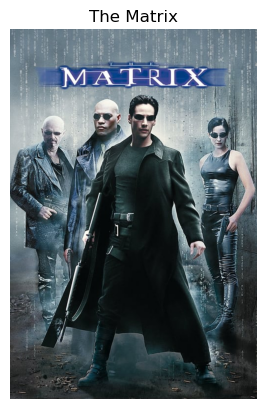

Recommendations



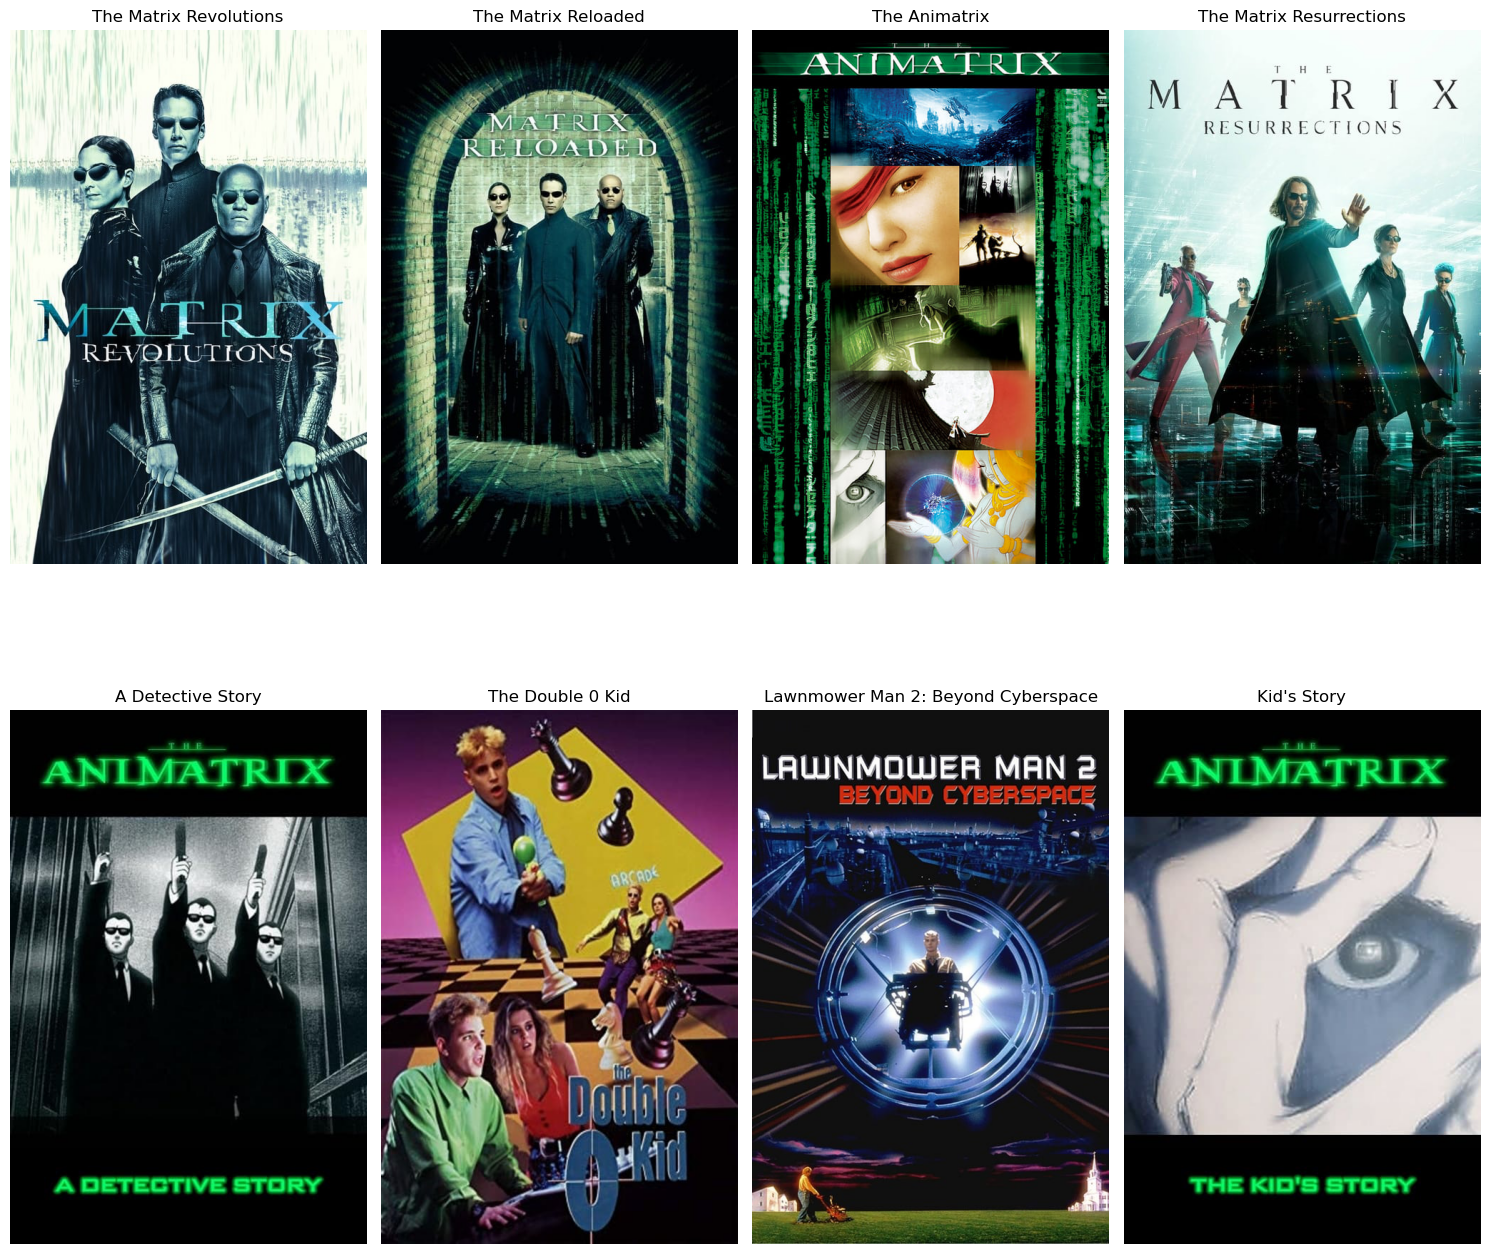

In [26]:
get_recommendations("The Matrix")


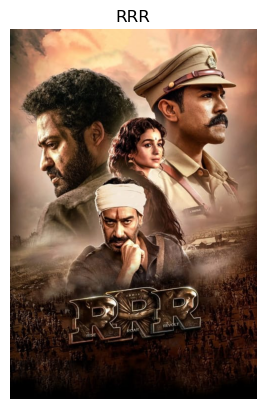

Recommendations



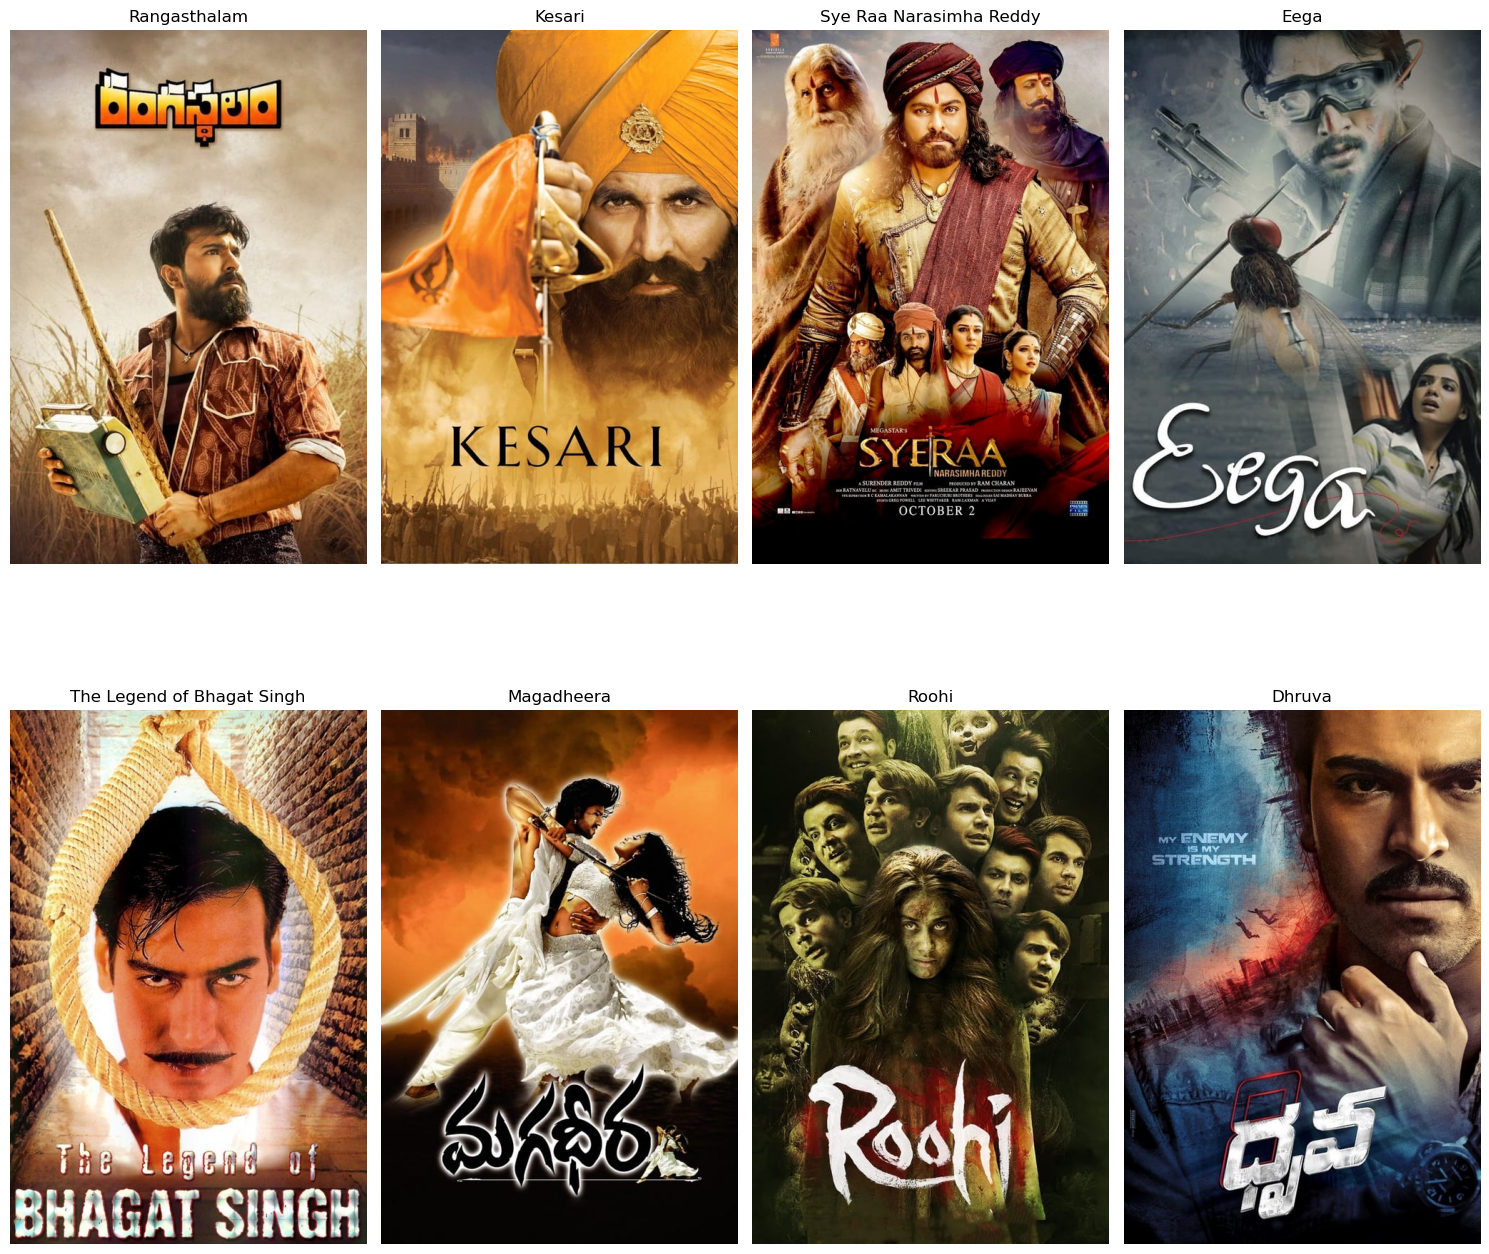

In [27]:
get_recommendations("RRR")
